In [2]:
import pandas as pd
import numpy as np

In [4]:
gender_df = pd.read_csv('gender_classification_v7.csv')

In [5]:
gender_df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [8]:
gender_df.gender.replace({'Male':1,'Female':0},inplace=True)

In [9]:
gender_df.gender

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [10]:
gender_df.isnull()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False


In [11]:
gender_df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [12]:
gender_df.isnull().sum() * 100 / len(gender_df)

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

In [14]:
gender_count = gender_df.gender.value_counts()
print(gender_count)

0    2501
1    2500
Name: gender, dtype: int64


In [15]:
precentage = round(gender_df.gender.value_counts(normalize=True) * 100, ndigits = 1 ) 
print(precentage)

0    50.0
1    50.0
Name: gender, dtype: float64


In [16]:
corr_df = gender_df.corr()
corr_df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


In [17]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap"
})


In [18]:
X=gender_df.drop('gender',axis=1)
y=gender_df.gender

In [20]:
X
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3 ,random_state=1234)


In [25]:
train_df = pd.merge(left=X_train, right=y_train,left_index=True,right_index=True)
test_df = pd.merge(left=X_test, right=y_test,left_index=True,right_index=True)


In [26]:
train_df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
1796,1,14.0,5.9,0,0,1,0,0
479,1,12.6,6.4,1,1,1,1,1
2524,1,14.3,5.4,0,0,0,0,0
1565,1,11.7,5.6,0,0,0,0,0
1893,1,12.8,6.4,0,0,0,0,0
...,...,...,...,...,...,...,...,...
664,1,15.1,5.6,1,1,1,1,1
3276,1,12.6,6.8,0,1,1,1,1
1318,1,13.3,5.1,0,0,1,1,0
723,0,12.9,6.2,0,0,0,0,0


In [27]:
test_df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
2706,1,13.1,6.2,1,1,1,1,1
2436,1,13.1,5.8,0,0,0,0,0
1201,1,11.6,5.6,0,0,0,0,0
1486,1,13.0,5.3,0,0,0,0,0
4286,1,15.4,5.3,0,0,1,0,1
...,...,...,...,...,...,...,...,...
1930,1,11.8,5.8,0,1,0,1,0
4460,1,14.3,5.4,0,0,0,0,0
2041,1,14.3,6.8,1,1,0,0,1
2805,1,14.2,5.7,0,0,0,0,0


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=9)

In [30]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [44]:
probability = dtree.predict_proba(X_test)

In [45]:
prediction = dtree.predict(X_test)

In [47]:
y_test_prob_0 = pd.Series(probability[:,0], name ='probability_0', index=X_test.index)
y_test_prob_1 = pd.Series(probability[:,1], name ='probability_1', index=X_test.index)

In [49]:
dtree.predict_proba(X_test[:20])

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ]])

In [41]:
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 

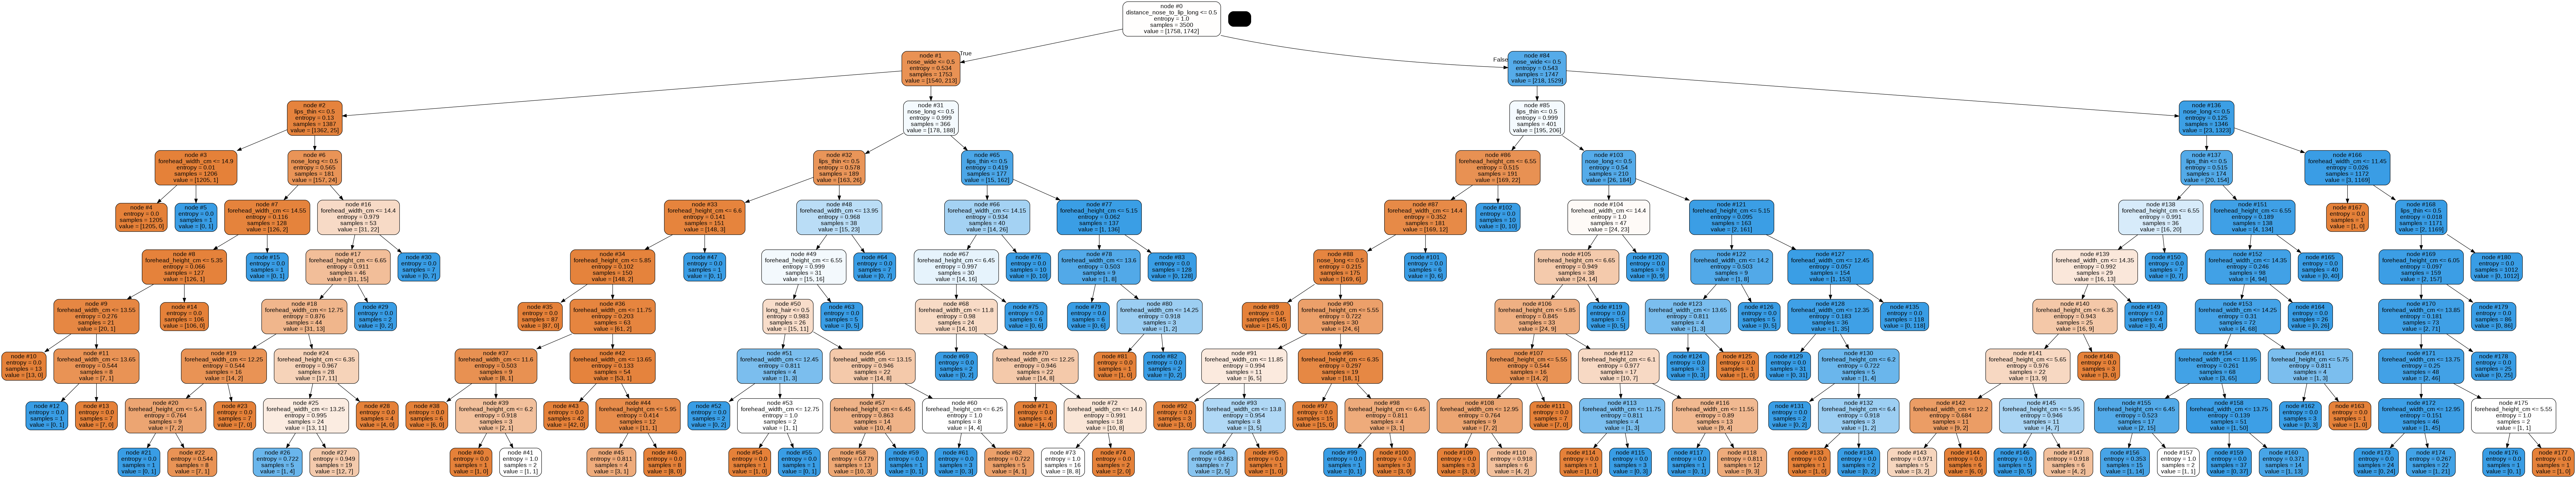

In [42]:
features = list(X.columns)
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True, node_ids=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [50]:
print(dtree.feature_importances_)

[4.43998539e-04 4.77566801e-02 4.10486697e-02 2.26909658e-01
 9.82832515e-02 1.08753840e-01 4.76803902e-01]


In [51]:
fig = go.Figure()
trace = go.Bar(
    x = dtree.feature_importances_,
    y = features,
    orientation='h'
)
fig.add_trace(trace)

In [53]:
y_pred = dtree.predict(X_test)
y_pred_df = pd.DataFrame(y_pred,columns=['y_pred'])
pred_df = pd.DataFrame({"prob_0":y_test_prob_0, "prob_1":y_test_prob_1,"Actual": gender_df.gender,"Prediction":y_pred} , index = y_test.index)
pred_df

,prob_0,prob_1,Actual,Prediction
2706,0.0,1.0,1,1
2436,1.0,0.0,0,0
1201,1.0,0.0,0,0
1486,1.0,0.0,0,0
4286,0.0,1.0,1,1
...,...,...,...,...
1930,1.0,0.0,0,0
4460,1.0,0.0,0,0
2041,0.0,1.0,1,1
2805,1.0,0.0,0,0


In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[723  20]
 [ 35 723]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       743
           1       0.97      0.95      0.96       758

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [55]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [56]:
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test,y_test_prob_1)

In [57]:
fig=go.Figure()

trace=go.Scatter(x=fp_rate, y=tp_rate, mode='lines', hoverinfo='x+y+text', text=thresholds)

fig.add_trace(trace)

fig.update_layout(
    title="ROC curve for wine quality classifier",
    xaxis_title="False Positive Rate (1 - Specificity)",
    yaxis_title="True Positive Rate (Sensitivity/Recall)",
    
)
fig.show()

In [58]:
AUC = metrics.roc_auc_score(y_test, y_test_prob_1)
print('AUC',AUC)

AUC 0.9760366765270937


In [79]:
from sklearn.preprocessing import binarize
y_pred_09 = binarize(X=[y_test_prob_1], threshold=0.9)[0]
y_pred_09 = pd.Series(y_pred_09)
y_pred_09

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1496    0.0
1497    0.0
1498    1.0
1499    0.0
1500    1.0
Length: 1501, dtype: float64

In [80]:
print(classification_report(y_test,y_pred_09))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       743
           1       0.98      0.95      0.97       758

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

